<a href="https://colab.research.google.com/github/nutyfreshz/MADT8101_Customer_Analytics/blob/main/EP_2_Customer_Data_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Data platform

**What is CDP ?**

Customer Data Platform (CDP) is a technology that gathers and consolidates customer data from various sources, creating a unified customer profile for businesses to comprehend customer behavior and preferences across touchpoints.

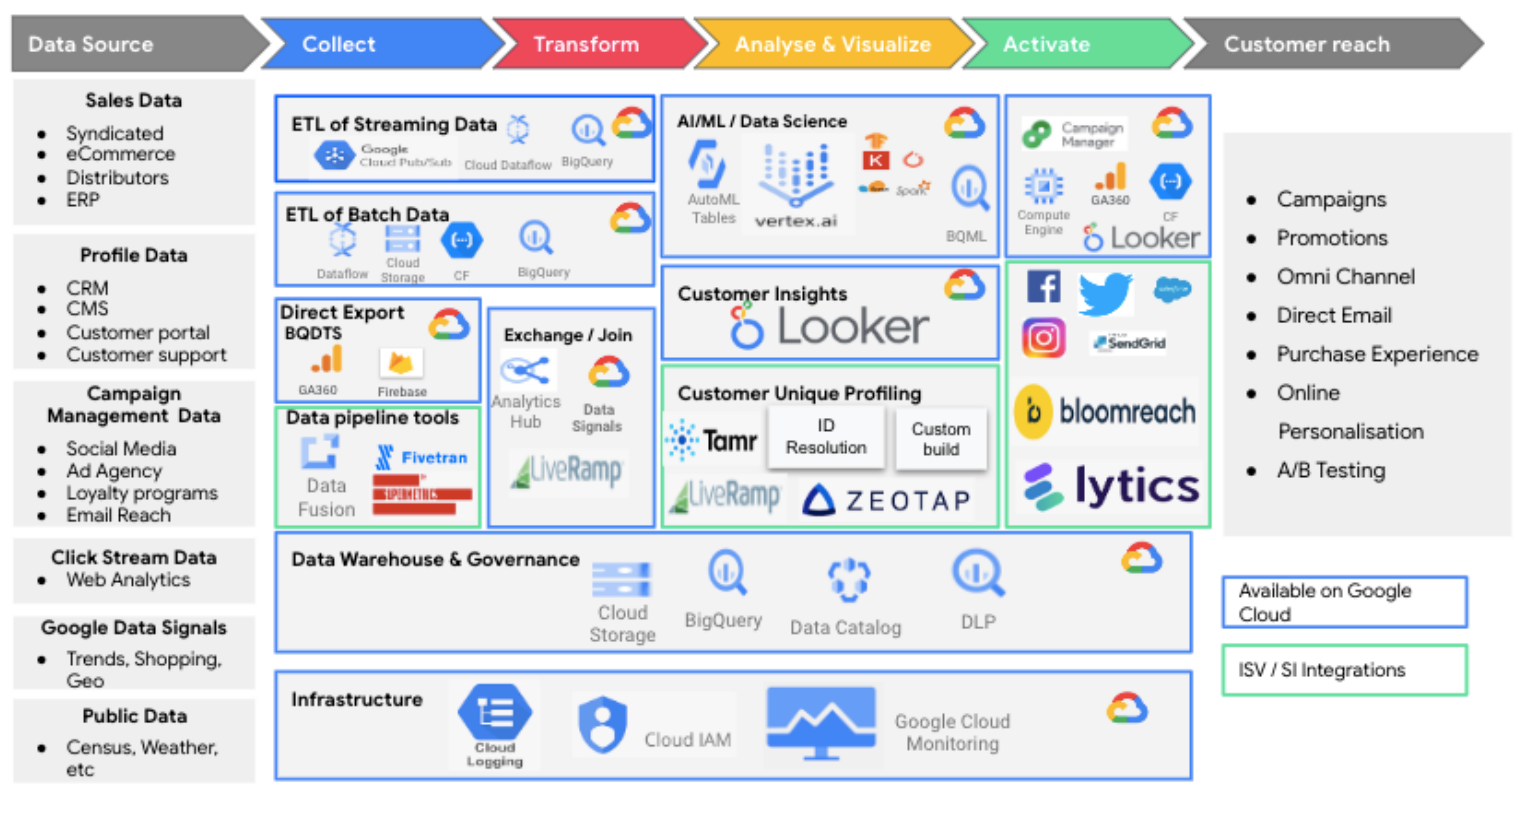

**Benefits of CDP ?**

CDP helps businesses overcome data fragmentation and silos by consolidating data from various sources into a single platform, offering a unified customer view for personalized experiences, journey analysis, identifying valuable customers, and data-driven decision making.

**Key Benefits of CDP + Analytics Architecture**

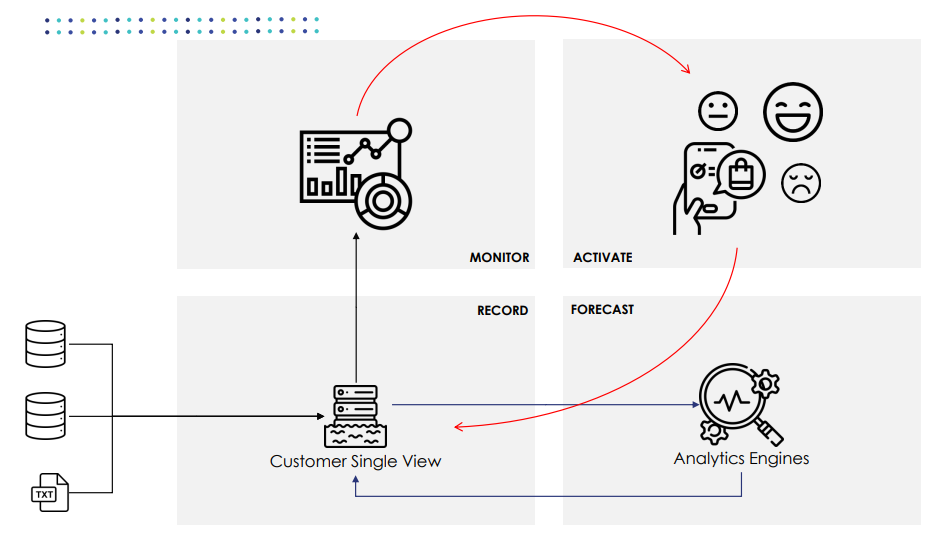

* **Personalization**: By combining customer data with analytics, businesses can provide personalized experiences and recommendations, enhancing customer satisfaction and loyalty.

* **Predictive Insights**: Integration of predictive analytics enables proactive and targeted customer engagement.

* **Real-time Decision-making**: Monitoring and real-time analysis enable businesses to make timely decisions and respond promptly to customer interactions and market changes.

* **Data-Driven Marketing**: Activation of insights helps in delivering targeted marketing campaigns, optimizing ad spends, and maximizing return on investment (ROI).

* **Enhanced Customer Experience**: By understanding customer behavior and preferences, businesses can optimize their products and services to better meet customer expectations.

# **Customer Data**

**Building Blocks of Customer Analytics**

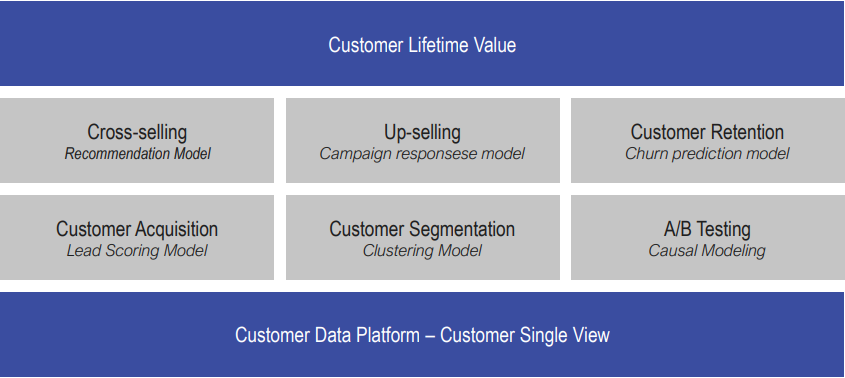

**Customer Data Analysis**

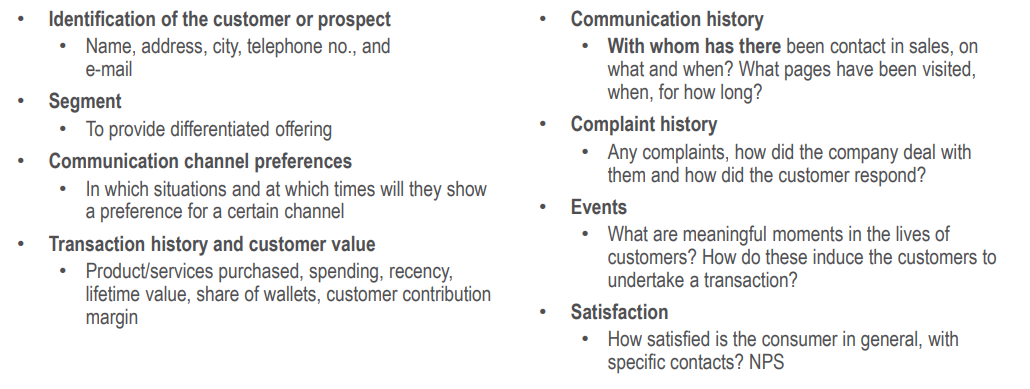

**Example of Customer Data platform**

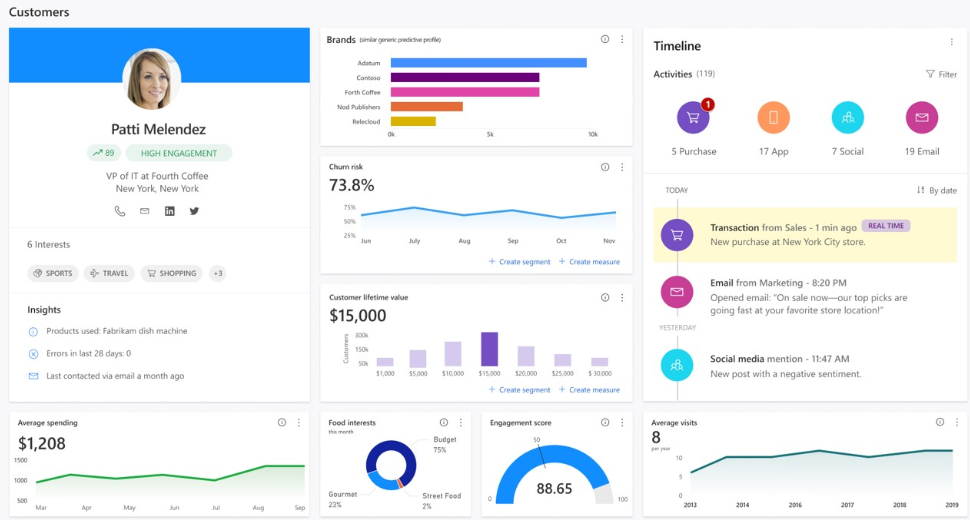

###**Customer Data in Action**

**Example of variables**
* Communication channel & Category preferences - Last used channel & Category / Most used channel % Category

* Sub-category penetration - Identify how much customer have purchase various Sup-category.

* Time period variable - The time period variable helps focus on recent customer behaviors, considering their extended usage like customer purchasing trend.


In [ ]:
## Communication channel preferences
from statistics import mode

def get_mode(x):
    try:
        return mode(x)
    except:
        return None
df_group = df_mas.groupby('customer_id').agg({'sales_channel': lambda x: get_mode(x)})

In [ ]:
# Calculate SKU Penetration by customer_id and join back to SVOC
df_group['sku_penetration'] = df_mas.groupby('customer_id')['brand'].nunique() / df_mas['brand'].nunique()

In [ ]:
##Time period variable
import pandas as pd
from dateutil.relativedelta import relativedelta

def sum_dollar_sales_last_months(df, months):
    end_date = df['date'].max()
    start_date = end_date - relativedelta(months=months)
    return df.loc[(df['date'] >= start_date) & (df['date'] <= end_date), 'dollar_sales'].sum()

df_group['dollar_sales_last_3_months'] = df_mas.groupby('customer_id').apply(lambda x: sum_dollar_sales_last_months(x, 3))
df_group['dollar_sales_last_6_months'] = df_mas.groupby('customer_id').apply(lambda x: sum_dollar_sales_last_months(x, 6))
df_group['dollar_sales_last_10_months'] = df_mas.groupby('customer_id').apply(lambda x: sum_dollar_sales_last_months(x, 10))
df_group['dollar_sales_last_18_months'] = df_mas.groupby('customer_id').apply(lambda x: sum_dollar_sales_last_months(x, 18))

**From Customer Data Plateform Example**

We can use CDP in many various benefits such as Sending
personalized communication who purchase "BEAUTY" category in score 4,5 (High, Highest spend in X category)

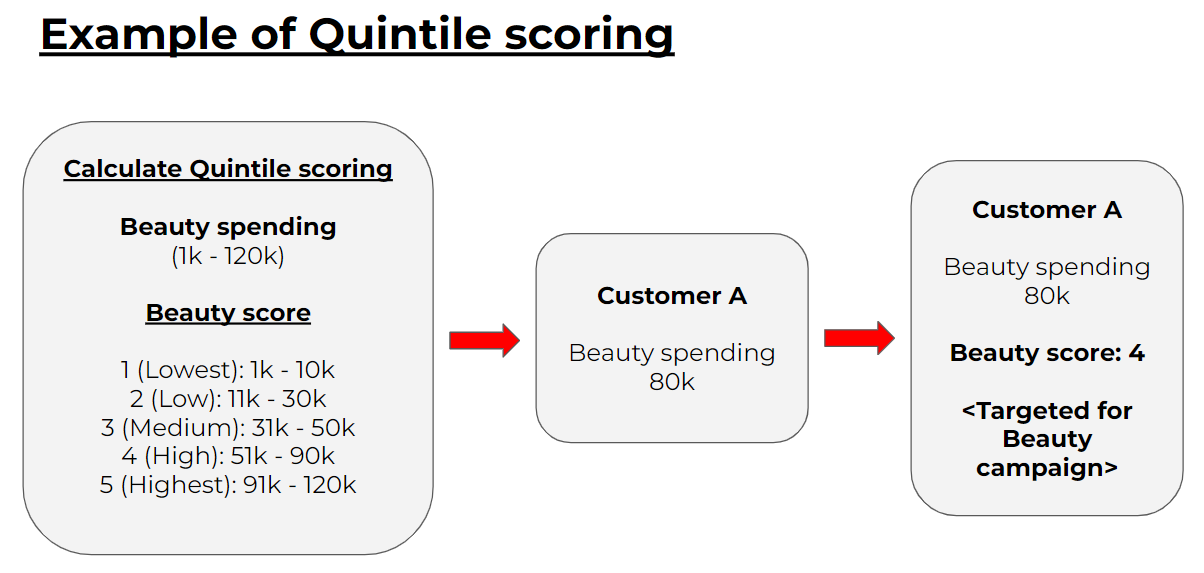

In [ ]:
df_category_x = df_mas[df_mas['category'] == 'BEAUTY']

cal_quin = df_category_x.groupby('customer_id')['total_amt'].sum().reset_index()

##Cal quintile based on BEAUTY spending
cal_quin['quintile'] = pd.qcut(cal_quin['total_amt'], q=5, labels=False) + 1


#Mapping score into human-readable label
quintile_names = {
    1: 'Lowest Spending',
    2: 'Low Spending',
    3: 'Medium Spending',
    4: 'High Spending',
    5: 'Highest Spending'
}

cal_quin['beauty_score'] = cal_quin['quintile'].map(quintile_names)


#Analyse BEAUTY spending range each quintile to mapping each customer to expand beauty score each customer
result = cal_quin.groupby('quintile')['total_amt'].agg(['min', 'max'])

result.rename(columns={'min': 'min_spending', 'max': 'max_spending'}, inplace=True)

After mapping customer scores based on their spending in the "BEAUTY" category, we can efficiently target those with scores 4 and 5 (indicating high and highest spend) through personalized communication.

To enhance the effectiveness of our approach, we will employ the Mean Time Between Purchase to track the buying cycle for the "BEAUTY" category. For instance, if BEAUTY typically make a purchase average every 3 months, we will identify customers with beauty scores of 4 and 5 who have not made a "BEAUTY" purchase in the last 3 months and notify them to consider making a new purchase.

